# Plot results

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def parse_results(file_path):
    # Models we expect
    models = ["MOM", "RANDOM", "JW", "DLCS"]

    # Prepare 4×4 dictionary of lists
    data = {
        model: {
            "runtime": [],
            "splits": [],
            "backtracks": [],
            "recursive": []
        }
        for model in models
    }

    with open(file_path, "r") as f:
        for line in f:
            line = line.strip()

            # Skip empty or separator lines
            if not line or line.startswith("-"):
                continue

            # Runtime
            if line.startswith("Runtime"):
                _, rest = line.split("Runtime ", 1)
                model, value = rest.split(": ")
                data[model]["runtime"].append(float(value))

            # Splits
            elif line.startswith("Splits"):
                _, rest = line.split("Splits ", 1)
                model, value = rest.split(": ")
                data[model]["splits"].append(int(value))

            # Backtracks
            elif line.startswith("Backtracks"):
                _, rest = line.split("Backtracks ", 1)
                model, value = rest.split(": ")
                data[model]["backtracks"].append(int(value))

            # Recursive calls
            elif line.startswith("Recursive calls"):
                _, rest = line.split("Recursive calls ", 1)
                model, value = rest.split(": ")
                data[model]["recursive"].append(int(value))

    return data

In [13]:
dataset_files = {
    'uf20-91': 'results_20_91.txt',
    'uf50-218-sat': 'results_50_218_SAT.txt',
    'uf50-218-unsat': 'results_50_218_UNSAT.txt',
    'uf100-430-sat': 'results_100_430_SAT.txt' 
}

dataset_results = {
    name: parse_results(path)
    for name, path in dataset_files.items()
}


In [15]:
models = ["RANDOM", "DLCS", "JW", "MOM"]
metrics = ["splits", "backtracks", "recursive"]

def compute_metric_stats(dataset_results, metric):
    """
    dataset_results: dict[dataset_name] -> parse_results(...) dict
    metric: one of "splits", "backtracks", "recursive"
    Returns: dataset_names, means, stds
      - dataset_names: list of dataset names in consistent order
      - means: dict[model] -> list of means per dataset (same order)
      - stds:  dict[model] -> list of stds per dataset (same order)
    """
    dataset_names = list(dataset_results.keys())

    means = {m: [] for m in models}
    stds = {m: [] for m in models}

    for ds in dataset_names:
        res = dataset_results[ds]
        for m in models:
            values = np.array(res[m][metric])
            means[m].append(values.mean())
            stds[m].append(values.std(ddof=1))  

    return dataset_names, means, stds

In [16]:
dataset_names, means_split, stds_split = compute_metric_stats(dataset_results, "splits")
print(dataset_names, means_split, stds_split)

['uf20-91', 'uf50-218-sat', 'uf50-218-unsat', 'uf100-430-sat'] {'RANDOM': [np.float64(11.593), np.float64(174.456), np.float64(470.514), np.float64(18641.196)], 'DLCS': [np.float64(5.968), np.float64(23.908), np.float64(58.387), np.float64(302.945)], 'JW': [np.float64(5.421), np.float64(17.069), np.float64(35.573), np.float64(127.681)], 'MOM': [np.float64(5.577), np.float64(16.991), np.float64(31.647), np.float64(119.484)]} {'RANDOM': [np.float64(6.736819407979981), np.float64(150.90670925740477), np.float64(145.99903260474542), np.float64(18275.6120183218)], 'DLCS': [np.float64(2.4631368299473424), np.float64(18.532970808993547), np.float64(21.30190137058197), np.float64(337.0470363015816)], 'JW': [np.float64(1.9061459525420377), np.float64(10.526872947559216), np.float64(10.673827879519212), np.float64(125.50254231340148)], 'MOM': [np.float64(1.9083272027387528), np.float64(9.295554116152857), np.float64(10.090699342127543), np.float64(107.15471934487009)]}


In [17]:
dataset_names, means_backtracks, stds_backtracks = compute_metric_stats(dataset_results, "backtracks")
print(dataset_names, means_backtracks, stds_backtracks)

['uf20-91', 'uf50-218-sat', 'uf50-218-unsat', 'uf100-430-sat'] {'RANDOM': [np.float64(14.022), np.float64(331.125), np.float64(941.028), np.float64(37250.674)], 'DLCS': [np.float64(3.731), np.float64(32.559), np.float64(116.774), np.float64(580.548)], 'JW': [np.float64(2.71), np.float64(19.58), np.float64(71.146), np.float64(231.139)], 'MOM': [np.float64(2.88), np.float64(19.217), np.float64(63.294), np.float64(214.238)]} {'RANDOM': [np.float64(13.690688476148706), np.float64(302.6901000556042), np.float64(291.99806520949085), np.float64(36551.95038556373)], 'DLCS': [np.float64(5.067772816664272), np.float64(37.6266698670675), np.float64(42.60380274116394), np.float64(675.3687353028897)], 'JW': [np.float64(3.8411788105547306), np.float64(21.858027664301584), np.float64(21.347655759038425), np.float64(252.33248971221357)], 'MOM': [np.float64(3.7322284937459993), np.float64(19.547071366294208), np.float64(20.181398684255086), np.float64(215.57111648424114)]}


In [18]:
dataset_names, means_recursive, stds_recursive = compute_metric_stats(dataset_results, "recursive")
print(dataset_names, means_recursive, stds_recursive)

['uf20-91', 'uf50-218-sat', 'uf50-218-unsat', 'uf100-430-sat'] {'RANDOM': [np.float64(20.704), np.float64(343.241), np.float64(942.028), np.float64(37271.458)], 'DLCS': [np.float64(9.273), np.float64(42.183), np.float64(117.774), np.float64(595.932)], 'JW': [np.float64(8.137), np.float64(28.706), np.float64(72.146), np.float64(245.716)], 'MOM': [np.float64(8.432), np.float64(28.478), np.float64(64.294), np.float64(229.177)]} {'RANDOM': [np.float64(13.914956342368091), np.float64(302.6902150471424), np.float64(291.99806520949085), np.float64(36552.09146635526)], 'DLCS': [np.float64(5.08943743191459), np.float64(37.63692401152157), np.float64(42.60380274116394), np.float64(675.1210601231618)], 'JW': [np.float64(3.7895371210204014), np.float64(21.668804791706926), np.float64(21.347655759038425), np.float64(252.0192513421287)], 'MOM': [np.float64(3.694187735216366), np.float64(19.28220213874233), np.float64(20.181398684255086), np.float64(215.2783650194451)]}


In [26]:
def plot_metric(dataset_results, metric):
    dataset_names, means, stds = compute_metric_stats(dataset_results, metric)

    x = np.arange(len(dataset_names))  # positions for datasets
    width = 0.18                       # bar width

    fig, ax = plt.subplots(figsize=(10, 5))

    for i, m in enumerate(models):
        x_positions = x + (i - (len(models) - 1) / 2) * width
        ax.bar(
            x_positions,
            means[m],
            width,
            yerr=stds[m],
            capsize=5,
            label=m
        )

    ax.set_yscale("log")
    ax.set_xticks(x)
    ax.set_xticklabels(dataset_names, rotation=45, ha="right")
    ax.set_xlabel("Dataset")
    ax.set_ylabel(metric.capitalize())
    ax.set_title(f"{metric.capitalize()} by heuristic and dataset")
    ax.legend(title="Heuristic")
    ax.grid(axis="y", linestyle="--", alpha=0.5)

    fig.tight_layout()
    plt.show()


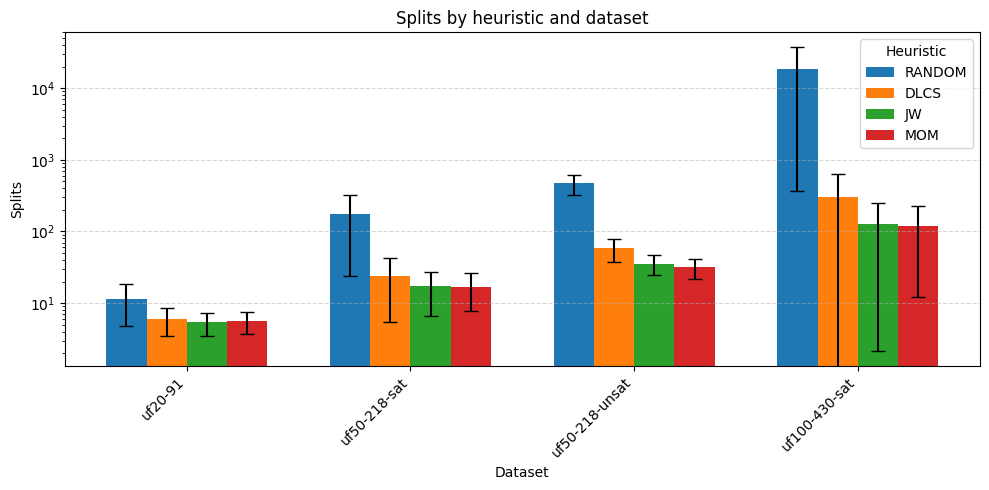

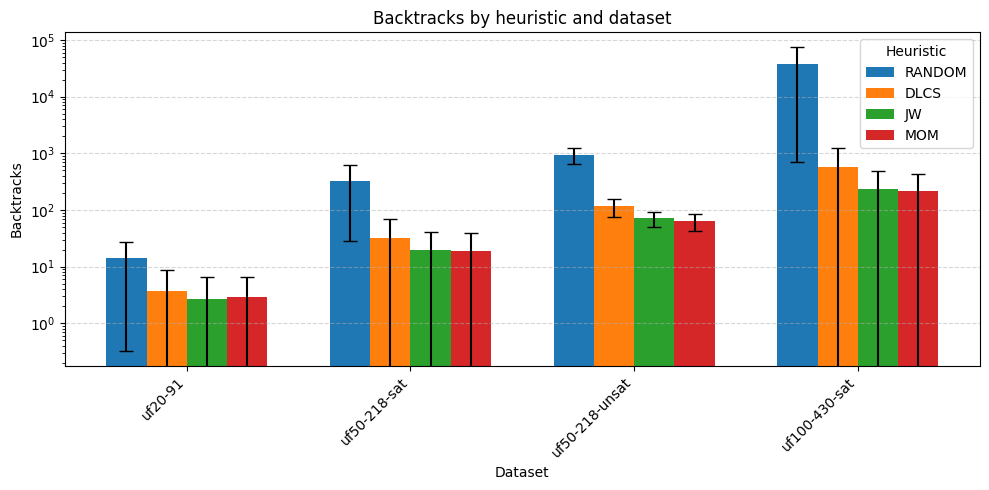

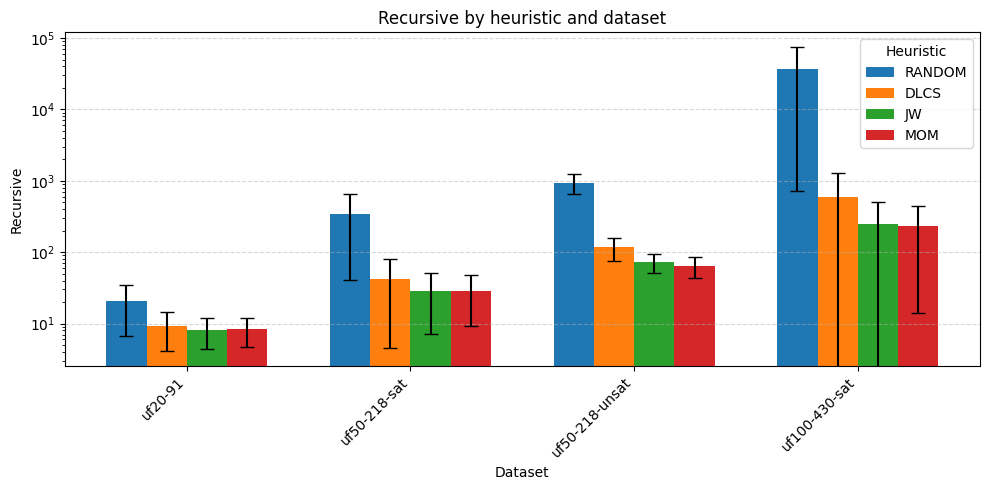

In [27]:
for metric in metrics:
    plot_metric(dataset_results, metric)